# Basic example of data management and vectorization
Dataset: [climate-change-earth-surface-temperature-data](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByMajorCity.csv)

In [1]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [2]:
from datetime import datetime

In [3]:
import geopandas

In [6]:
D = pd.read_csv('https://island.ricerca.di.unimi.it/~alfio/shared/GlobalLandTemperaturesByMajorCity.csv')
D.shape

(239177, 7)

In [5]:
D.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [7]:
dtypes = {
    'dt': lambda x: datetime.strptime(x, '%Y-%m-%d'),
    'Latitude': lambda x: float(x[:-1]) if x[-1] == 'N' else -1*float(x[:-1]),
    'Longitude': lambda x: float(x[:-1]) if x[-1] == 'E' else -1*float(x[:-1]),
}

In [8]:
D = pd.read_csv('https://island.ricerca.di.unimi.it/~alfio/shared/GlobalLandTemperaturesByMajorCity.csv', 
               converters=dtypes)
type(D.dt.values[0])

numpy.datetime64

In [9]:
dates = [x.astype('M8[D]').astype('O') for x in D.dt.values]
D['year'] = [x.year for x in dates]
D['month'] = [x.month for x in dates]
D['day'] = [x.day for x in dates]

In [10]:
D.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month,day
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63,-3.23,1849,1,1
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63,-3.23,1849,2,1
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63,-3.23,1849,3,1
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63,-3.23,1849,4,1
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63,-3.23,1849,5,1


In [11]:
E = D[D.dt == datetime(1975, 1, 1)].copy()
E.dropna(inplace=True)

In [12]:
E.shape

(100, 10)

In [13]:
import matplotlib.pyplot as plt

In [14]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

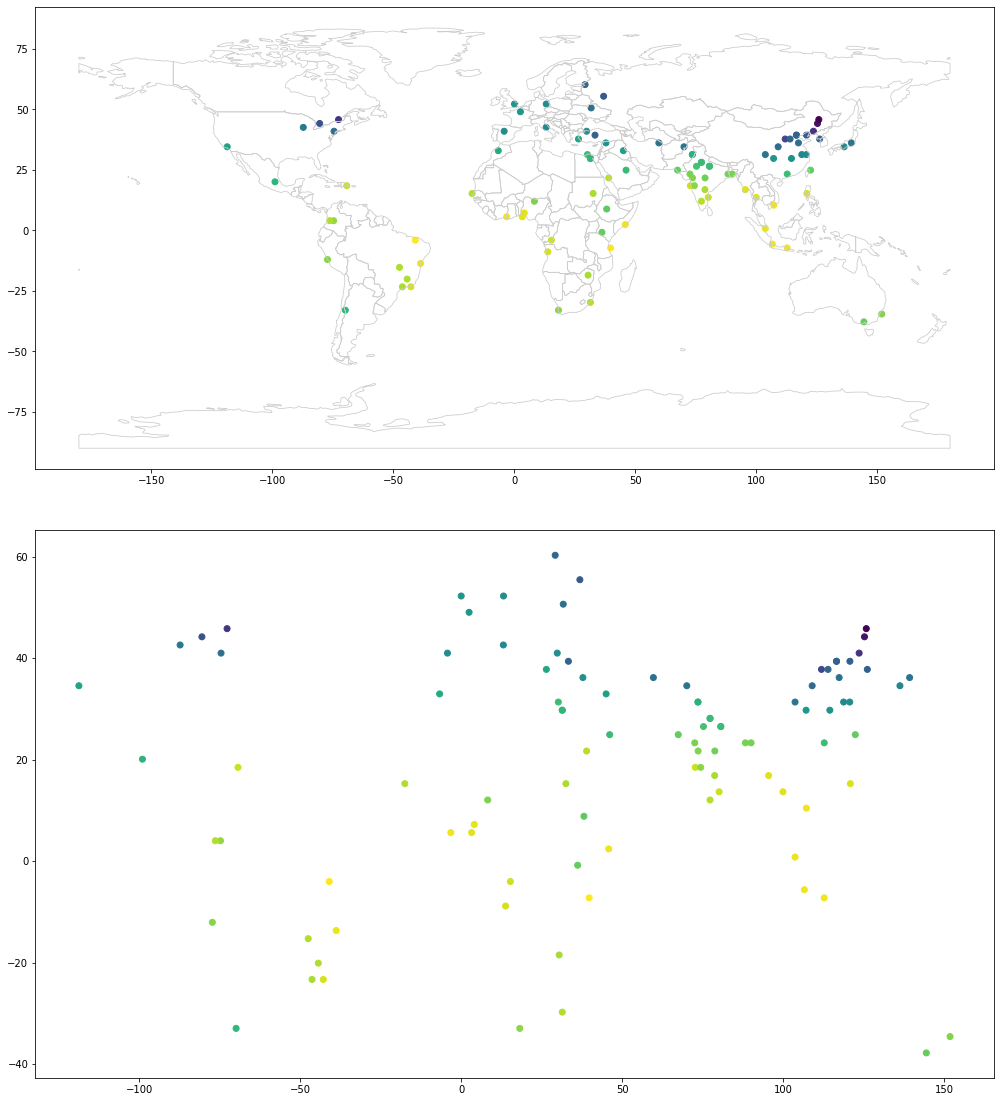

In [15]:
fig, ax = plt.subplots(figsize=(14, 16), nrows=2)
world.boundary.plot(ax=ax[0], linewidth=0.8, color='#cccccc')
ax[0].scatter(E.Longitude, E.Latitude, c=E.AverageTemperature)
ax[1].scatter(E.Longitude, E.Latitude, c=E.AverageTemperature)
plt.tight_layout()
plt.show()

## Other internal relations

In [16]:
T = D[(D.City=='Abidjan') & (D.dt > datetime(1900, 1, 1))]
time = T.dt.values
temp = T.AverageTemperature.values
inc = T.AverageTemperatureUncertainty.values

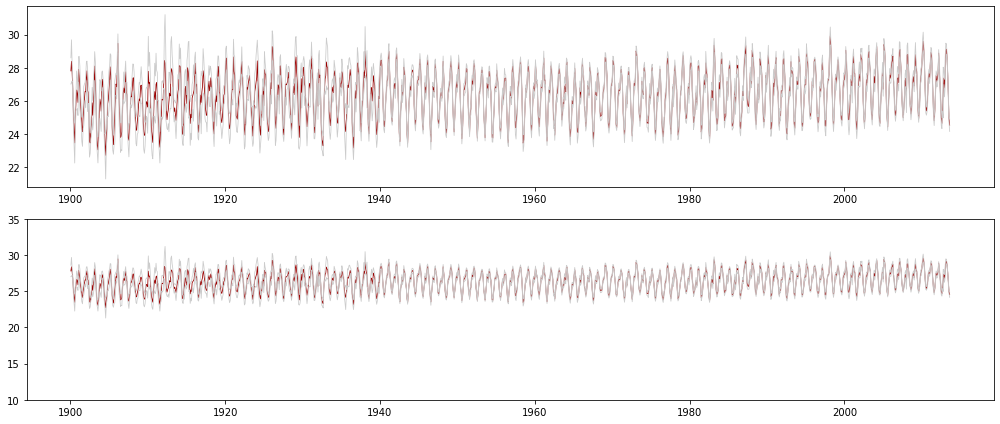

In [17]:
fig, ax = plt.subplots(figsize=(14, 6), nrows=2)
ax[0].plot(time, temp, linewidth=0.8, c='#990000')
ax[0].plot(time, temp + inc, linewidth=0.8, c='#cccccc')
ax[0].plot(time, temp - inc, linewidth=0.8, c='#cccccc')
ax[1].plot(time, temp, linewidth=0.8, c='#990000')
ax[1].plot(time, temp + inc, linewidth=0.8, c='#cccccc')
ax[1].plot(time, temp - inc, linewidth=0.8, c='#cccccc')
ax[1].set_ylim(10, 35)
plt.tight_layout()
plt.show()

In [21]:
T = D[(D.City=='Rome') & (D.dt > datetime(1900, 1, 1)) & (D.month == 1)]
time = T.dt.values
temp = T.AverageTemperature.values
inc = T.AverageTemperatureUncertainty.values

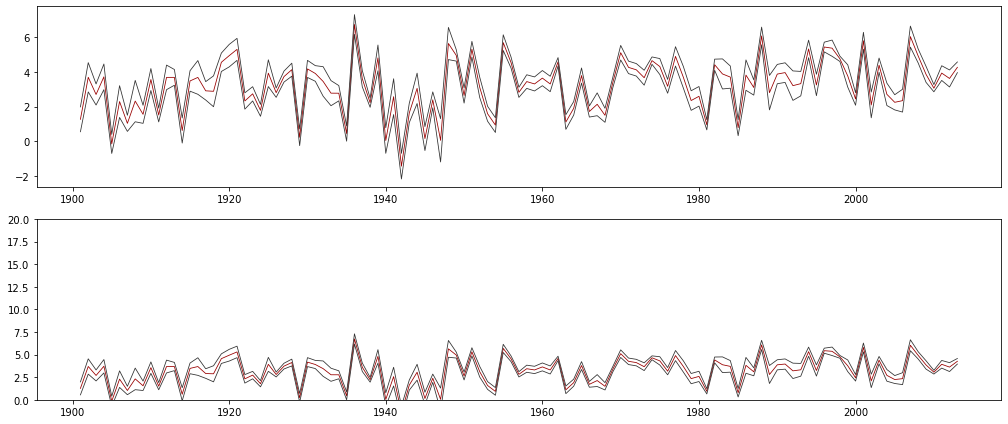

In [23]:
fig, ax = plt.subplots(figsize=(14, 6), nrows=2)
ax[0].plot(time, temp, linewidth=0.8, c='#990000')
ax[0].plot(time, temp + inc, linewidth=0.8, c='#333333')
ax[0].plot(time, temp - inc, linewidth=0.8, c='#333333')
ax[1].plot(time, temp, linewidth=0.8, c='#990000')
ax[1].plot(time, temp + inc, linewidth=0.8, c='#333333')
ax[1].plot(time, temp - inc, linewidth=0.8, c='#333333')
ax[1].set_ylim(0, 20)
plt.tight_layout()
plt.show()

## Clustering

In [24]:
from sklearn.cluster import KMeans

In [25]:
D.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month,day
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63,-3.23,1849,1,1
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63,-3.23,1849,2,1
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63,-3.23,1849,3,1
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63,-3.23,1849,4,1
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63,-3.23,1849,5,1


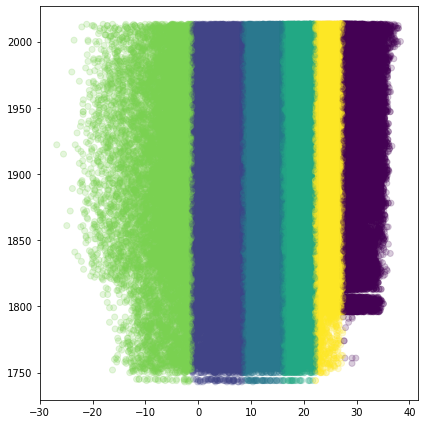

In [39]:
X = D[['AverageTemperature', 'year']].dropna()
fig, ax = plt.subplots(figsize=(6, 6), nrows=1)
ax.scatter(X.AverageTemperature, X.year, alpha=0.2, c=y_pred)
plt.tight_layout()
plt.show()

In [37]:
kmeans = KMeans(n_clusters=6)
y_pred = kmeans.fit_predict(K)

In [38]:
y_pred

array([5, 5, 0, ..., 5, 5, 5], dtype=int32)

In [35]:
K = X.copy()
K['AverageTemperature'] = K.AverageTemperature / K.AverageTemperature.values.max()
K['year'] = K.year / K.year.values.max()

In [36]:
K

,AverageTemperature,year
0,0.697542,0.91853
1,0.716611,0.91853
2,0.734033,0.91853
3,0.682810,0.91853
4,0.664185,0.91853
...,...,...
239171,0.328161,1.00000
239172,0.495755,1.00000
239173,0.614424,1.00000
239174,0.659588,1.00000
